In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/30000-spotify-songs/readme.md
/kaggle/input/30000-spotify-songs/spotify_songs.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv("/kaggle/input/30000-spotify-songs/spotify_songs.csv")

# Convert 'track_album_release_date' to datetime with errors='coerce'
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce', dayfirst=True)

In [4]:
df['track_album_release_date'].isna().sum()

1886

1886 rows don't match the specified datetime format "%Y-%m-%d"

In [5]:
df.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... key  loudness  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   6    -2.634   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...  11    -4.969   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -3.432   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   7    -3.778   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -4.672   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583        0.1020          0.000000    0.0653    0.518   
1     1       0.0373        0.0724          0.004210    0.3570    0.693   
2     0       0.0742        0.0794          0.000023    0.1100    0.613   
3     1       0.1020        0.0287          0.000009    0.2040    0.277   
4     1       0.0359        0.0803          0.000000    0.0833    0.725   

     tempo  duration_ms  
0  122.036       194754  
1   99.972       162600  
2  124.008       176616  
3  121.956       169093  
4  123.976       189052  

[5 rows x 23 columns]

In [6]:
df.shape

(32833, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_id                  32833 non-null  object        
 1   track_name                32828 non-null  object        
 2   track_artist              32828 non-null  object        
 3   track_popularity          32833 non-null  int64         
 4   track_album_id            32833 non-null  object        
 5   track_album_name          32828 non-null  object        
 6   track_album_release_date  30947 non-null  datetime64[ns]
 7   playlist_name             32833 non-null  object        
 8   playlist_id               32833 non-null  object        
 9   playlist_genre            32833 non-null  object        
 10  playlist_subgenre         32833 non-null  object        
 11  danceability              32833 non-null  float64       
 12  energy            

Columns with missing values: track_name,  track_artist, track_album_name, track_album_release_date

In [8]:
columns_to_drop = ["track_album_id", "playlist_id"]
df.drop(columns = columns_to_drop, axis = 1, inplace = True)

We drop these columns as they do not provide analytical insights.

In [9]:
# Numerical columns
num_cols = ["track_popularity", "danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]

df_num = df[num_cols]
print(df_num.columns)

Index(['track_popularity', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')


In [10]:
# Categorical features
df['key'] = df['key'].astype('category')
df['mode'] = df['mode'].astype('category')

cat_cols = ["track_artist", "track_album_name", "playlist_name", "playlist_genre", "playlist_subgenre", "key", "mode"] # track_name
df_cat = df[cat_cols]
print(df_cat.columns)

Index(['track_artist', 'track_album_name', 'playlist_name', 'playlist_genre',
       'playlist_subgenre', 'key', 'mode'],
      dtype='object')


**DESCRIPTIVE SUMMARY**

In [11]:
# Descriptive statistics of the numerical columns

display(round(df_num.describe(),2).T)

count       mean       std      min        25%        50%  \
track_popularity  32833.0      42.48     24.98     0.00      24.00      45.00   
danceability      32833.0       0.65      0.15     0.00       0.56       0.67   
energy            32833.0       0.70      0.18     0.00       0.58       0.72   
loudness          32833.0      -6.72      2.99   -46.45      -8.17      -6.17   
speechiness       32833.0       0.11      0.10     0.00       0.04       0.06   
acousticness      32833.0       0.18      0.22     0.00       0.02       0.08   
instrumentalness  32833.0       0.08      0.22     0.00       0.00       0.00   
liveness          32833.0       0.19      0.15     0.00       0.09       0.13   
valence           32833.0       0.51      0.23     0.00       0.33       0.51   
tempo             32833.0     120.88     26.90     0.00      99.96     121.98   
duration_ms       32833.0  225799.81  59834.01  4000.00  187819.00  216000.00   

                        75%        max  
track_popularity      62.00     100.00  
danceability           0.76       0.98  
energy                 0.84       1.00  
loudness              -4.64       1.27  
speechiness            0.13       0.92  
acousticness           0.26       0.99  
instrumentalness       0.00       0.99  
liveness               0.25       1.00  
valence                0.69       0.99  
tempo                133.92     239.44  
duration_ms       253585.00  517810.00

In [12]:
# Descriptive statistics of the categorical columns

display(df_cat.describe().T)

count unique                        top   freq
track_artist       32828  10692              Martin Garrix    161
track_album_name   32828  19743              Greatest Hits    139
playlist_name      32833    449            Indie Poptimism    308
playlist_genre     32833      6                        edm   6043
playlist_subgenre  32833     24  progressive electro house   1809
key                32833     12                          1   4010
mode               32833      2                          1  18574

In [13]:
df.isnull().sum()

track_id                       0
track_name                     5
track_artist                   5
track_popularity               0
track_album_name               5
track_album_release_date    1886
playlist_name                  0
playlist_genre                 0
playlist_subgenre              0
danceability                   0
energy                         0
key                            0
loudness                       0
mode                           0
speechiness                    0
acousticness                   0
instrumentalness               0
liveness                       0
valence                        0
tempo                          0
duration_ms                    0
dtype: int64

In [14]:
df.duplicated().sum()

0

**Univariate Analysis**

In [15]:
cat_univariate_analysis = df[["playlist_genre", "playlist_subgenre", "key", "mode"]]

def univariate_categorical_analysis(col):
    value_counts = cat_univariate_analysis[col].value_counts()

    # Count plot
    bar_fig = px.bar(
        y=value_counts.index,
        x=value_counts.values,
        title=f'Distribution of {col}',
        labels={'x': 'Count', 'y': 'Categories'}
    )
    bar_fig.update_layout(width=1000)
    bar_fig.show()

    # Donut chart
    percentage = (value_counts / value_counts.sum()) * 100
    pie_fig = px.pie(
        values=percentage,
        names=value_counts.index,
        labels={'names': 'Categories', 'values': 'Percentage'},
        hole=0.5
    )
    pie_fig.update_layout(width=1000)
    pie_fig.show()

for cat in cat_univariate_analysis:
    univariate_categorical_analysis(cat)

*Insights*
* The frequency of each genre (playlist_genre) is similar, electronic dance music (edm) has the highest frequency while rock has the lowest frequency.
* The most frequent subgenres are progressive electro house, southern hip hop, indie poptimism, latin hip hop and neo soul respectively.
* The fact that Key 1 (C#/Db) has the highest occurrence at 12% suggests that tracks in this key are relatively common.
* Key 0 (C) and Key 7 both have approximately 10% occurrence, indicating that tracks in these keys are also fairly common. It might be interesting to explore whether these keys correlate with specific genres and artists.
* The fact that 56% of the songs in the dataset are in major mode suggests that major tonalities are more common.
* Major keys are generally associated with a more upbeat and positive mood. The prevalence of major mode could indicate a general inclination towards more cheerful or optimistic musical content.

Description of track_popularity
count    32833.000000
mean        42.477081
std         24.984074
min          0.000000
25%         24.000000
50%         45.000000
75%         62.000000
max        100.000000
Name: track_popularity, dtype: float64


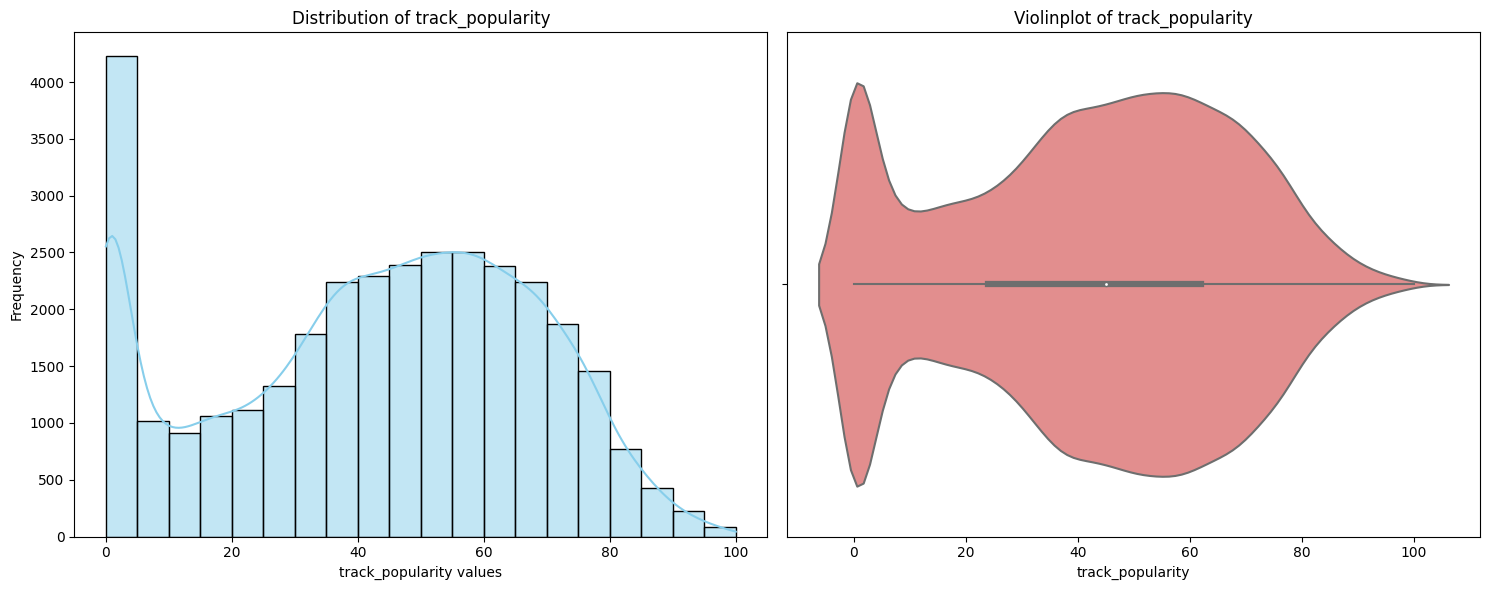

Description of danceability
count    32833.000000
mean         0.654850
std          0.145085
min          0.000000
25%          0.563000
50%          0.672000
75%          0.761000
max          0.983000
Name: danceability, dtype: float64


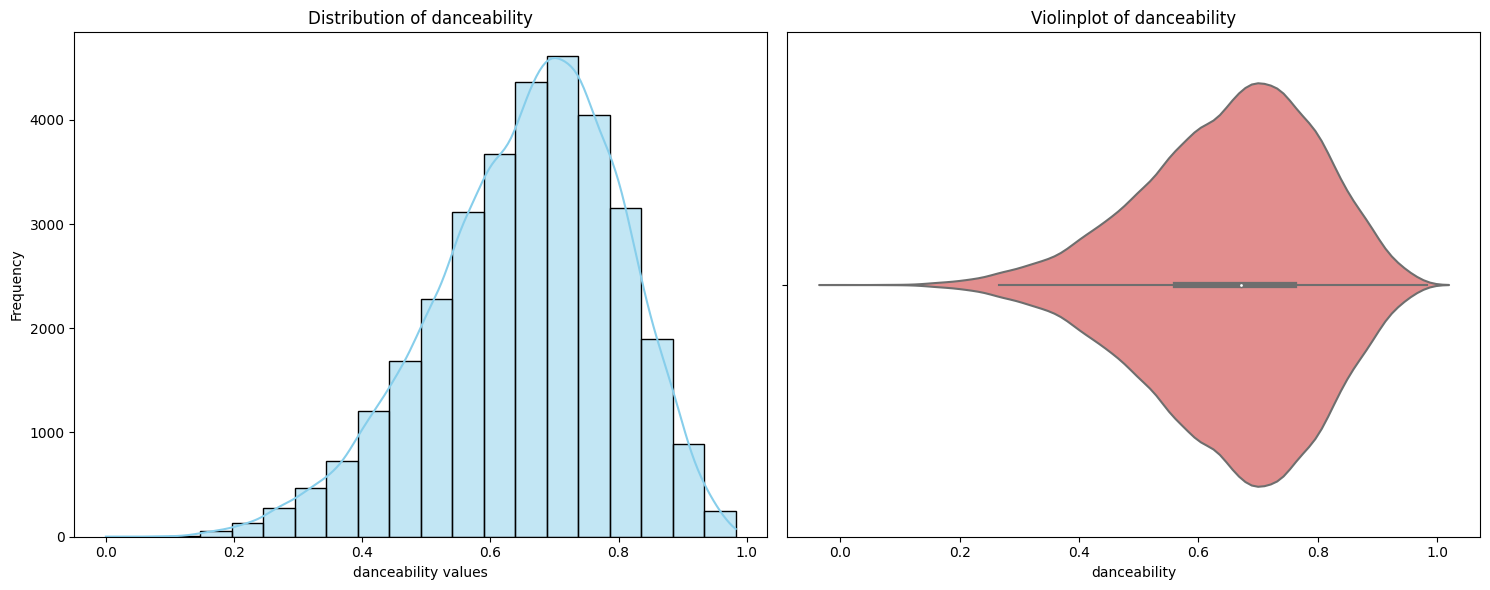

Description of energy
count    32833.000000
mean         0.698619
std          0.180910
min          0.000175
25%          0.581000
50%          0.721000
75%          0.840000
max          1.000000
Name: energy, dtype: float64


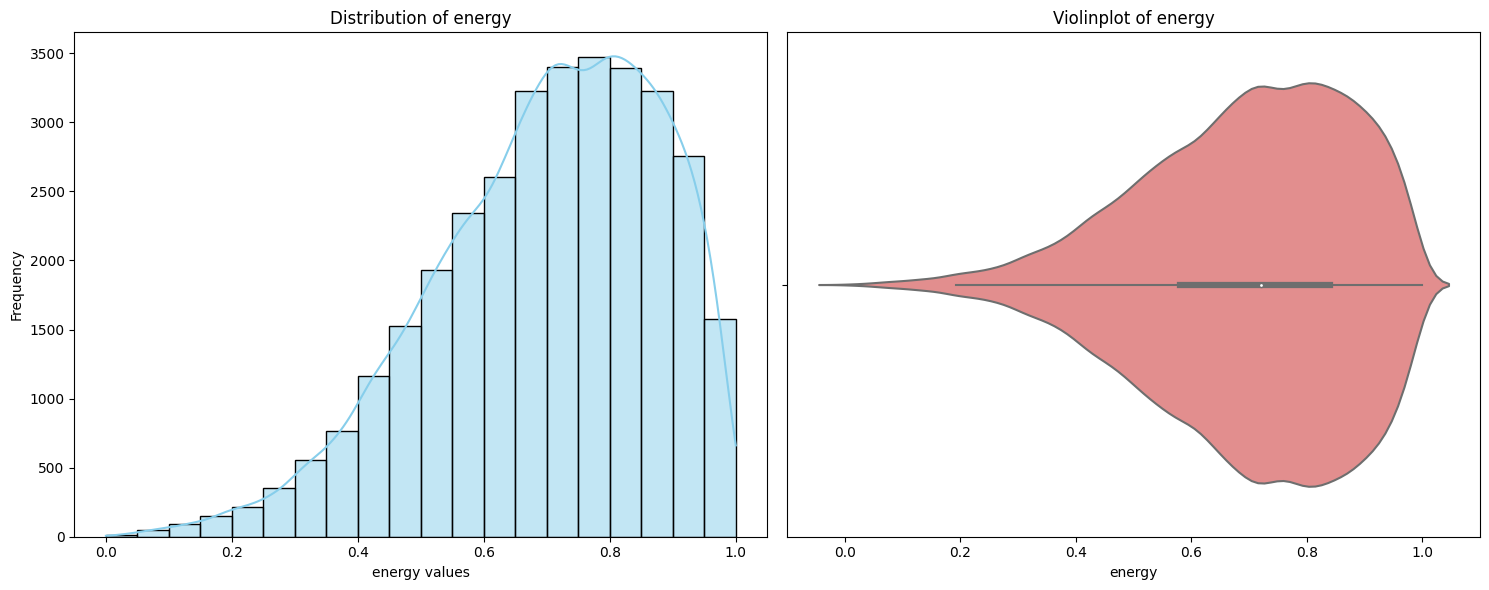

Description of loudness
count    32833.000000
mean        -6.719499
std          2.988436
min        -46.448000
25%         -8.171000
50%         -6.166000
75%         -4.645000
max          1.275000
Name: loudness, dtype: float64


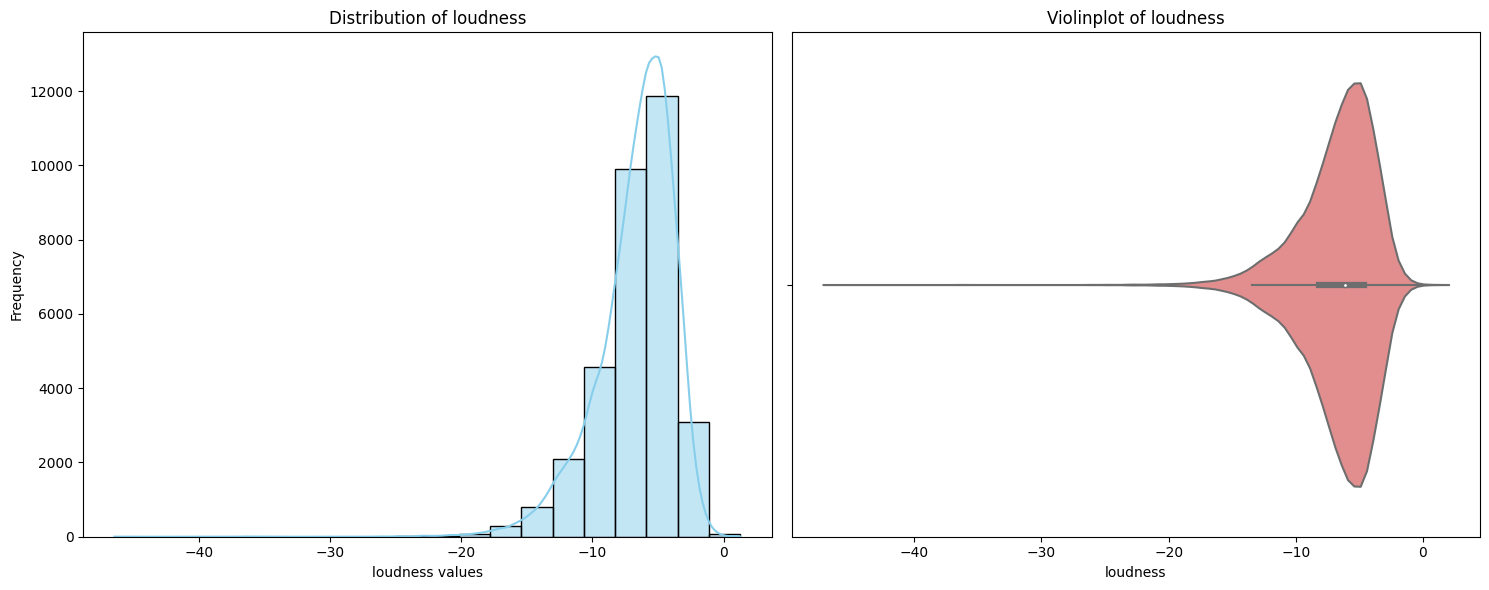

Description of speechiness
count    32833.000000
mean         0.107068
std          0.101314
min          0.000000
25%          0.041000
50%          0.062500
75%          0.132000
max          0.918000
Name: speechiness, dtype: float64


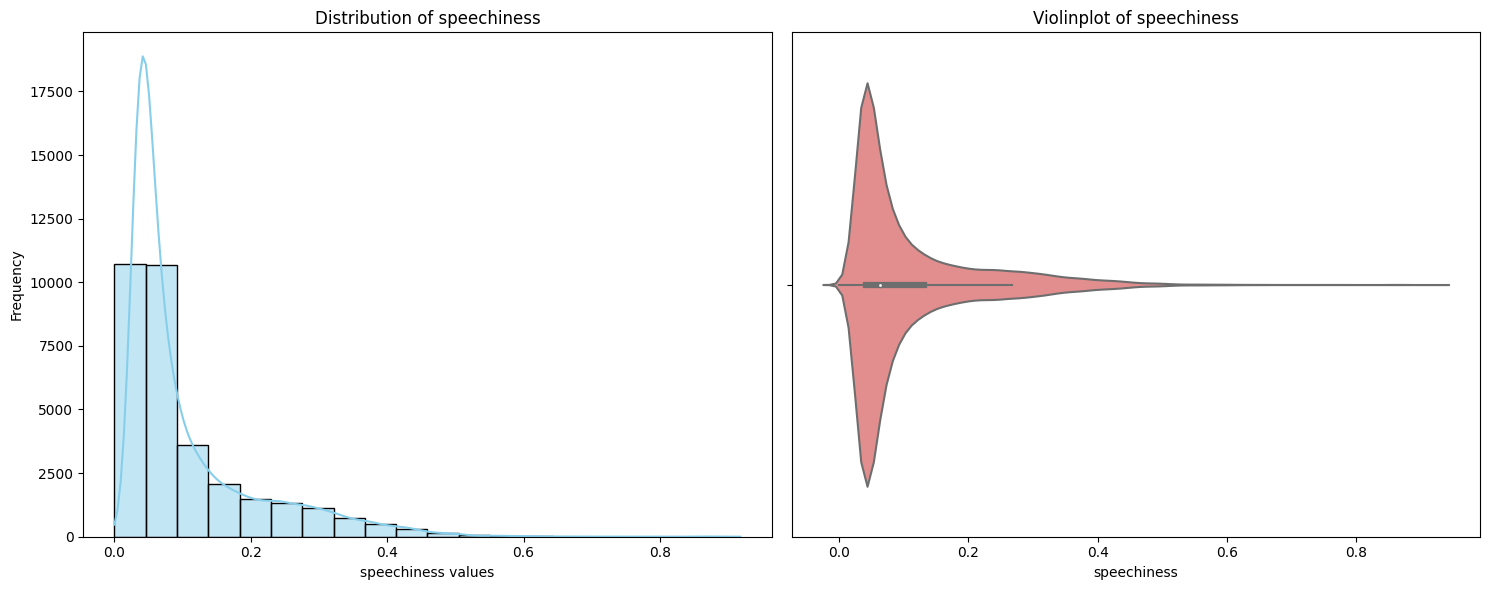

Description of acousticness
count    32833.000000
mean         0.175334
std          0.219633
min          0.000000
25%          0.015100
50%          0.080400
75%          0.255000
max          0.994000
Name: acousticness, dtype: float64


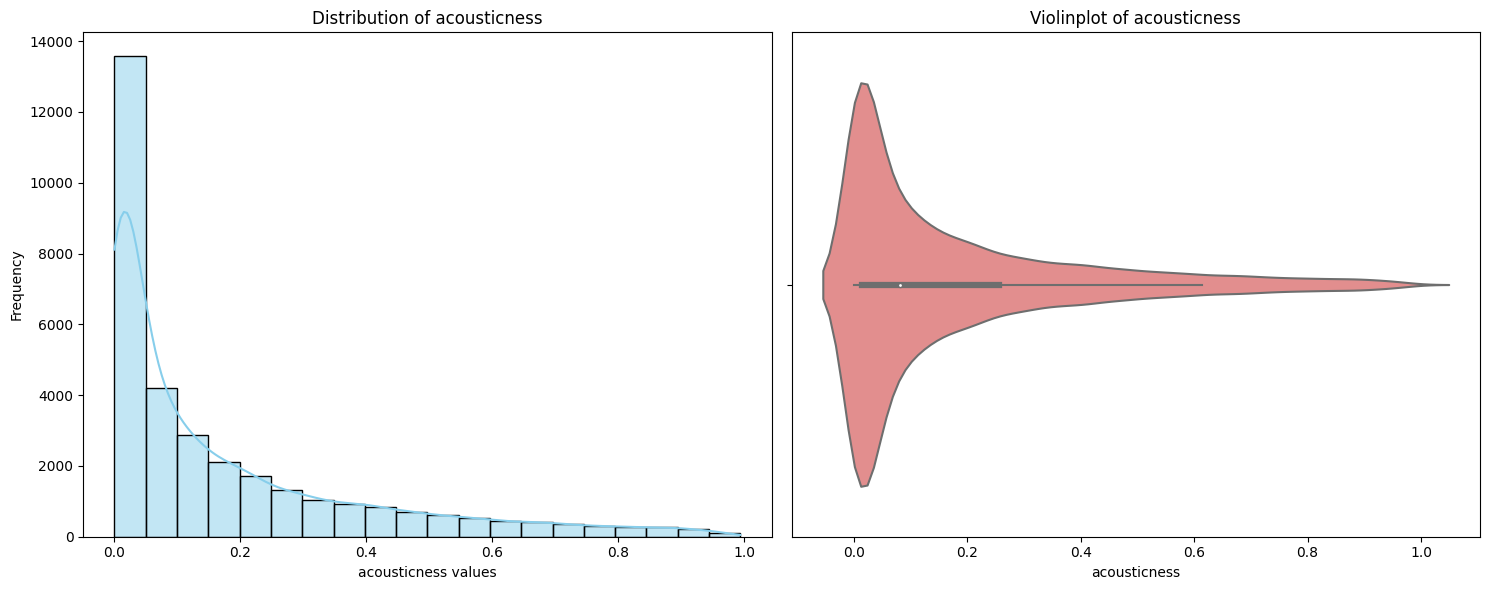

Description of instrumentalness
count    32833.000000
mean         0.084747
std          0.224230
min          0.000000
25%          0.000000
50%          0.000016
75%          0.004830
max          0.994000
Name: instrumentalness, dtype: float64


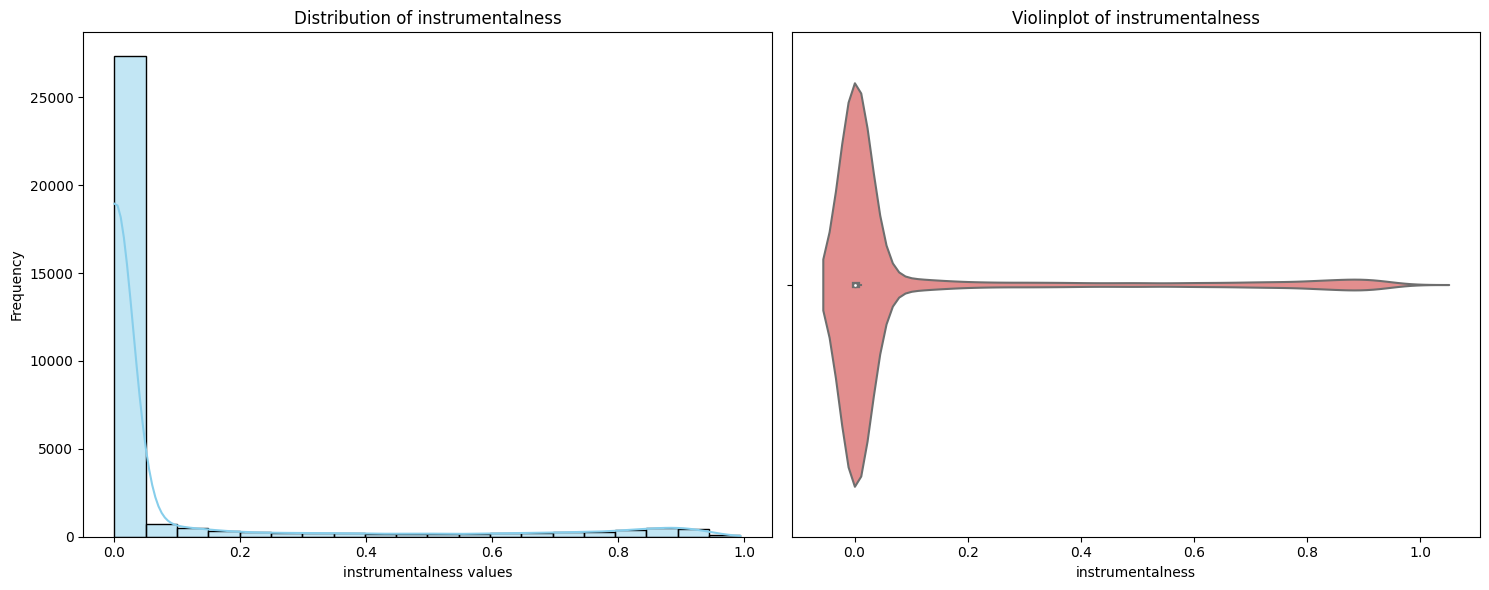

Description of liveness
count    32833.000000
mean         0.190176
std          0.154317
min          0.000000
25%          0.092700
50%          0.127000
75%          0.248000
max          0.996000
Name: liveness, dtype: float64


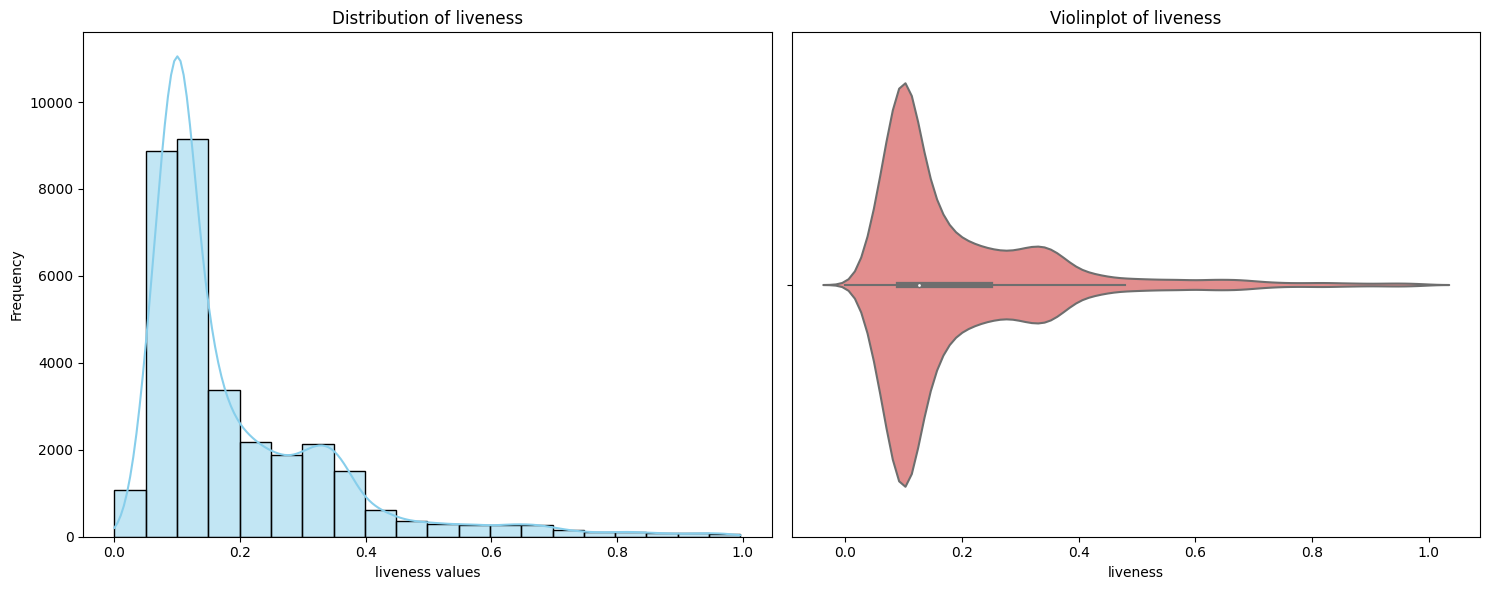

Description of valence
count    32833.000000
mean         0.510561
std          0.233146
min          0.000000
25%          0.331000
50%          0.512000
75%          0.693000
max          0.991000
Name: valence, dtype: float64


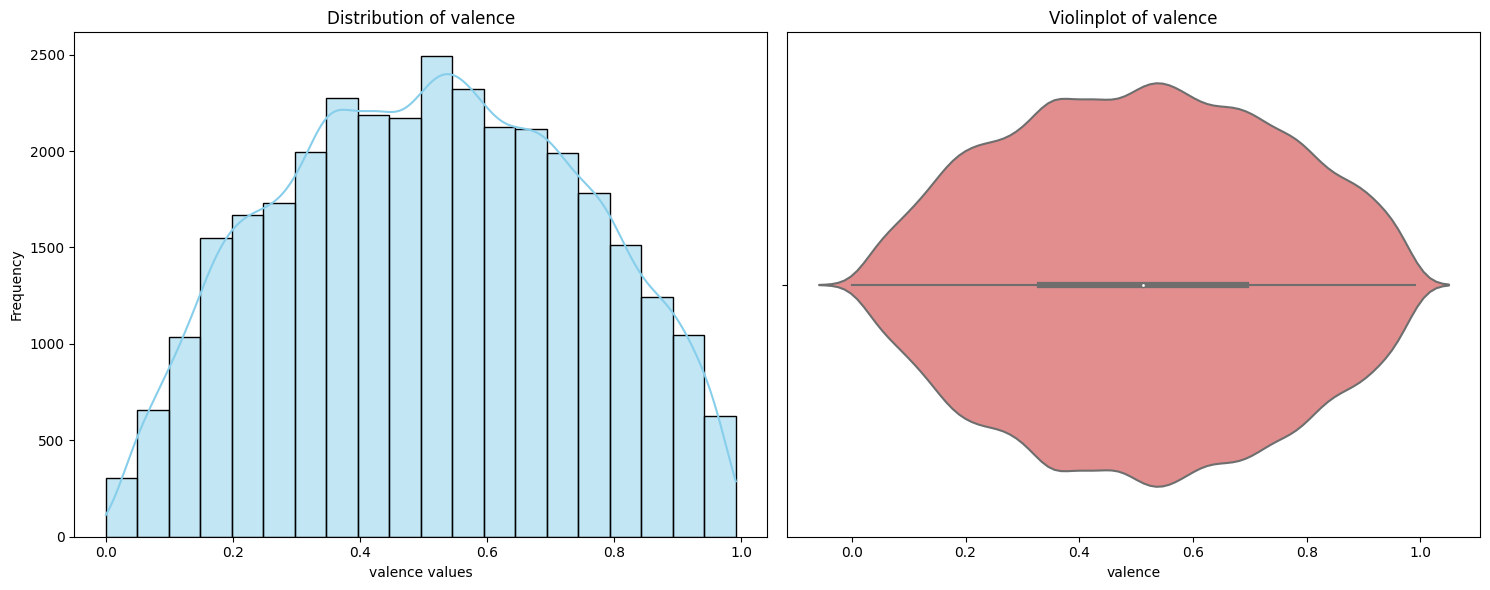

Description of tempo
count    32833.000000
mean       120.881132
std         26.903624
min          0.000000
25%         99.960000
50%        121.984000
75%        133.918000
max        239.440000
Name: tempo, dtype: float64


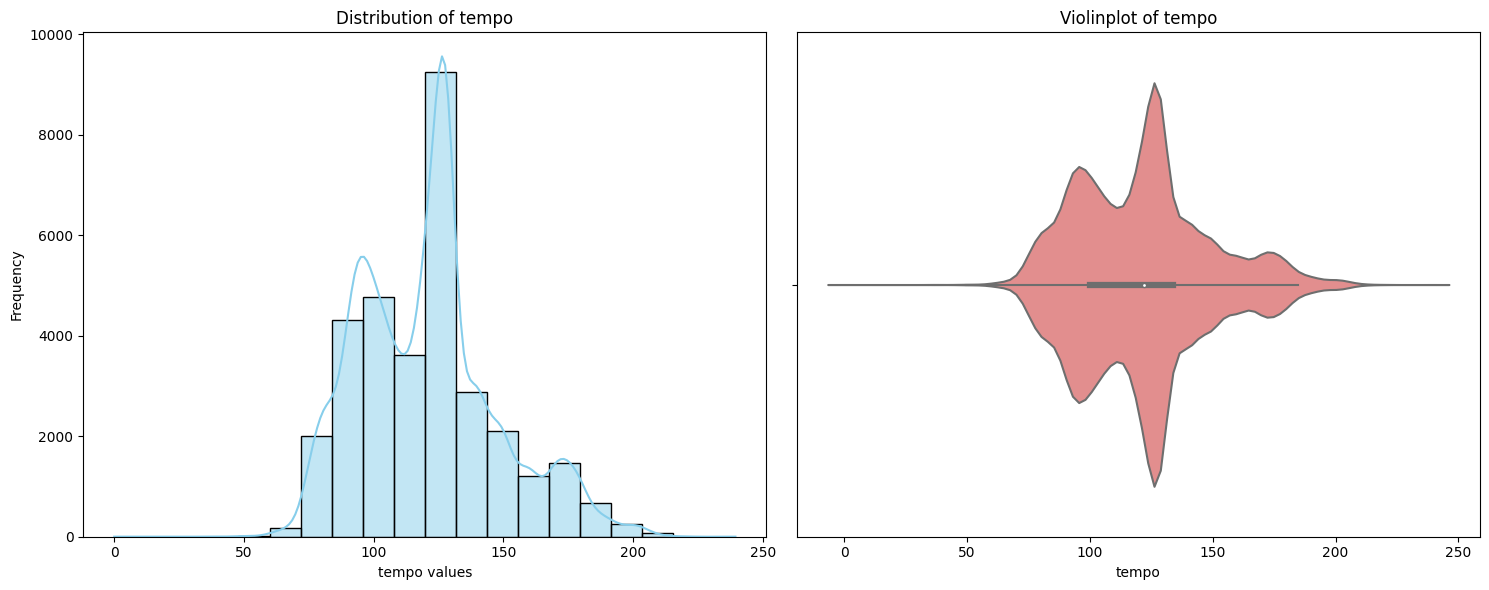

Description of duration_ms
count     32833.000000
mean     225799.811622
std       59834.006182
min        4000.000000
25%      187819.000000
50%      216000.000000
75%      253585.000000
max      517810.000000
Name: duration_ms, dtype: float64


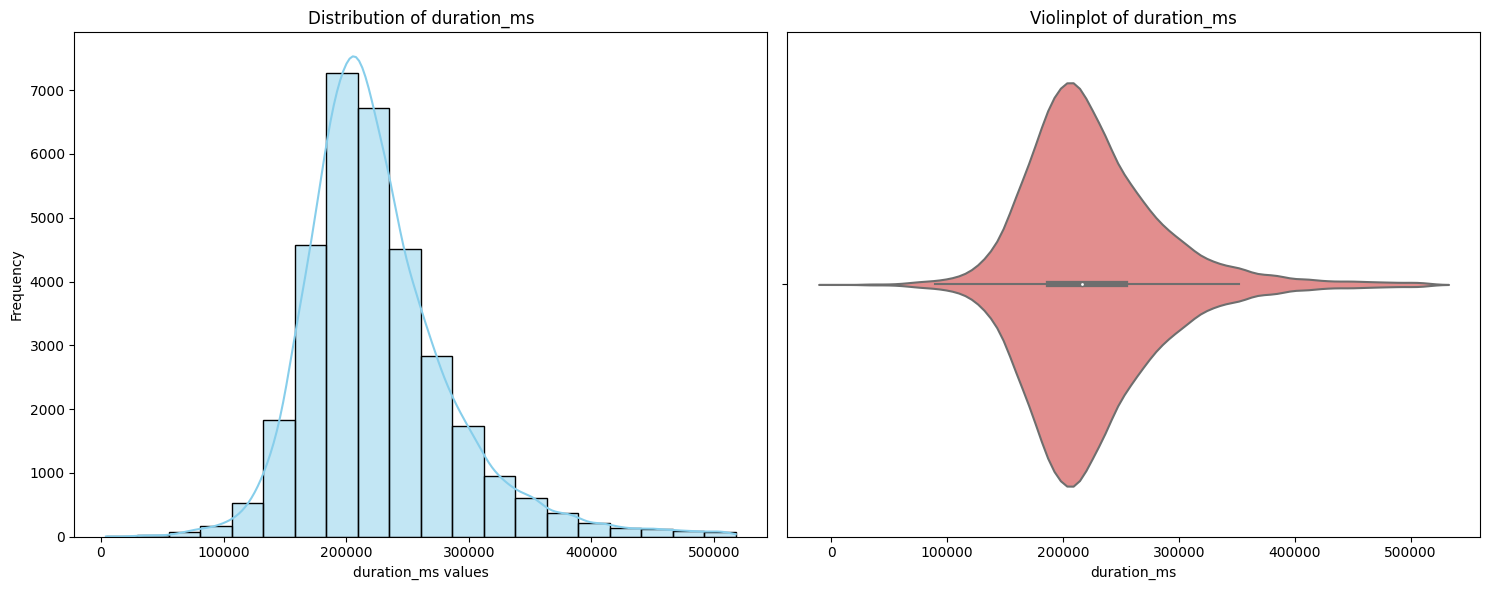

In [16]:
def univariate_numerical_analysis(column, nbins):
    print(f"Description of {column}")
    print(df[column].describe())
    
    # Create subplots with one row and two columns
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot histogram with KDE
    sns.histplot(df[column], bins=nbins, kde=True, ax=axes[0], color='skyblue', edgecolor='black')
    axes[0].set_title(f"Distribution of {column}")
    axes[0].set_xlabel(f"{column} values")
    axes[0].set_ylabel("Frequency")
    
    # Plot boxplot
    sns.violinplot(x=df[column], ax=axes[1], color='lightcoral')
    axes[1].set_title(f"Violinplot of {column}")
    axes[1].set_xlabel(f"{column}")
    
    plt.tight_layout()
    plt.show()

for cat in df_num:
    univariate_numerical_analysis(cat, 20)

*Insights*

* Track popularity is highly skewed towards 0, which means that significant portion of the tracks in the dataset has low popularity scores. On average, the tracks have a moderate popularity level (42.48). The interquartile range is 38.
* The high mean values for danceability and energy suggest that, on average, the tracks in the dataset are perceived as danceable and energetic.
* The presence of outliers (as seen in the plot) in speechiness suggests that while most tracks have low spoken words content, there are some tracks with a significant amount of spoken words.
* The limited number of acoustic tracks may indicate a prevalence of non-acoustic or electronic music in the dataset.
* The distribution of liveness values suggests that while most tracks have low liveness (indicating studio recordings), there are tracks with a higher probability of being performed live.
* The valence distribution suggests that the frequency of moderate valence tracks are dominant, while the plot relatively leans towards high valence, meaning that there are more amount of high valence (positive, happy, cheerful, euphoric) tracks in the dataset compared to low valence (negative, sad, depressed, angry) tracks. This aligns with our previous hypothesis that the fact that there are more major tracks with major tonalities suggests an inclination towards positive music  
* The mean tempo of approximately 121 BPM suggests a moderate pace for the tracks in the dataset. 
* The duration_ms distribution suggests that significant amount of songs have the length of approximately more than 3 minutes (180000ms).

In [17]:
# Most frequent 10 artists
track_artist_counts = df['track_artist'].value_counts().nlargest(10)

fig = go.Figure(go.Funnel(
    y=track_artist_counts.index,
    x=track_artist_counts.values
))

fig.update_layout(
    title_text='Top 10 Most Frequent Artist Distribution',
    margin=dict(l=50, r=50, t=50, b=50),
)

fig.show()

In [18]:
# Most frequent 10 albums
track_album_counts = df['track_album_name'].value_counts().nlargest(10)

fig = go.Figure(go.Funnel(
    y=track_album_counts.index,
    x=track_album_counts.values
))

fig.update_layout(
    title_text='Top 10 Most Frequent Album Distribution',
    margin=dict(l=50, r=50, t=50, b=50),
)

fig.show()

**BIVARIATE ANALYSIS**

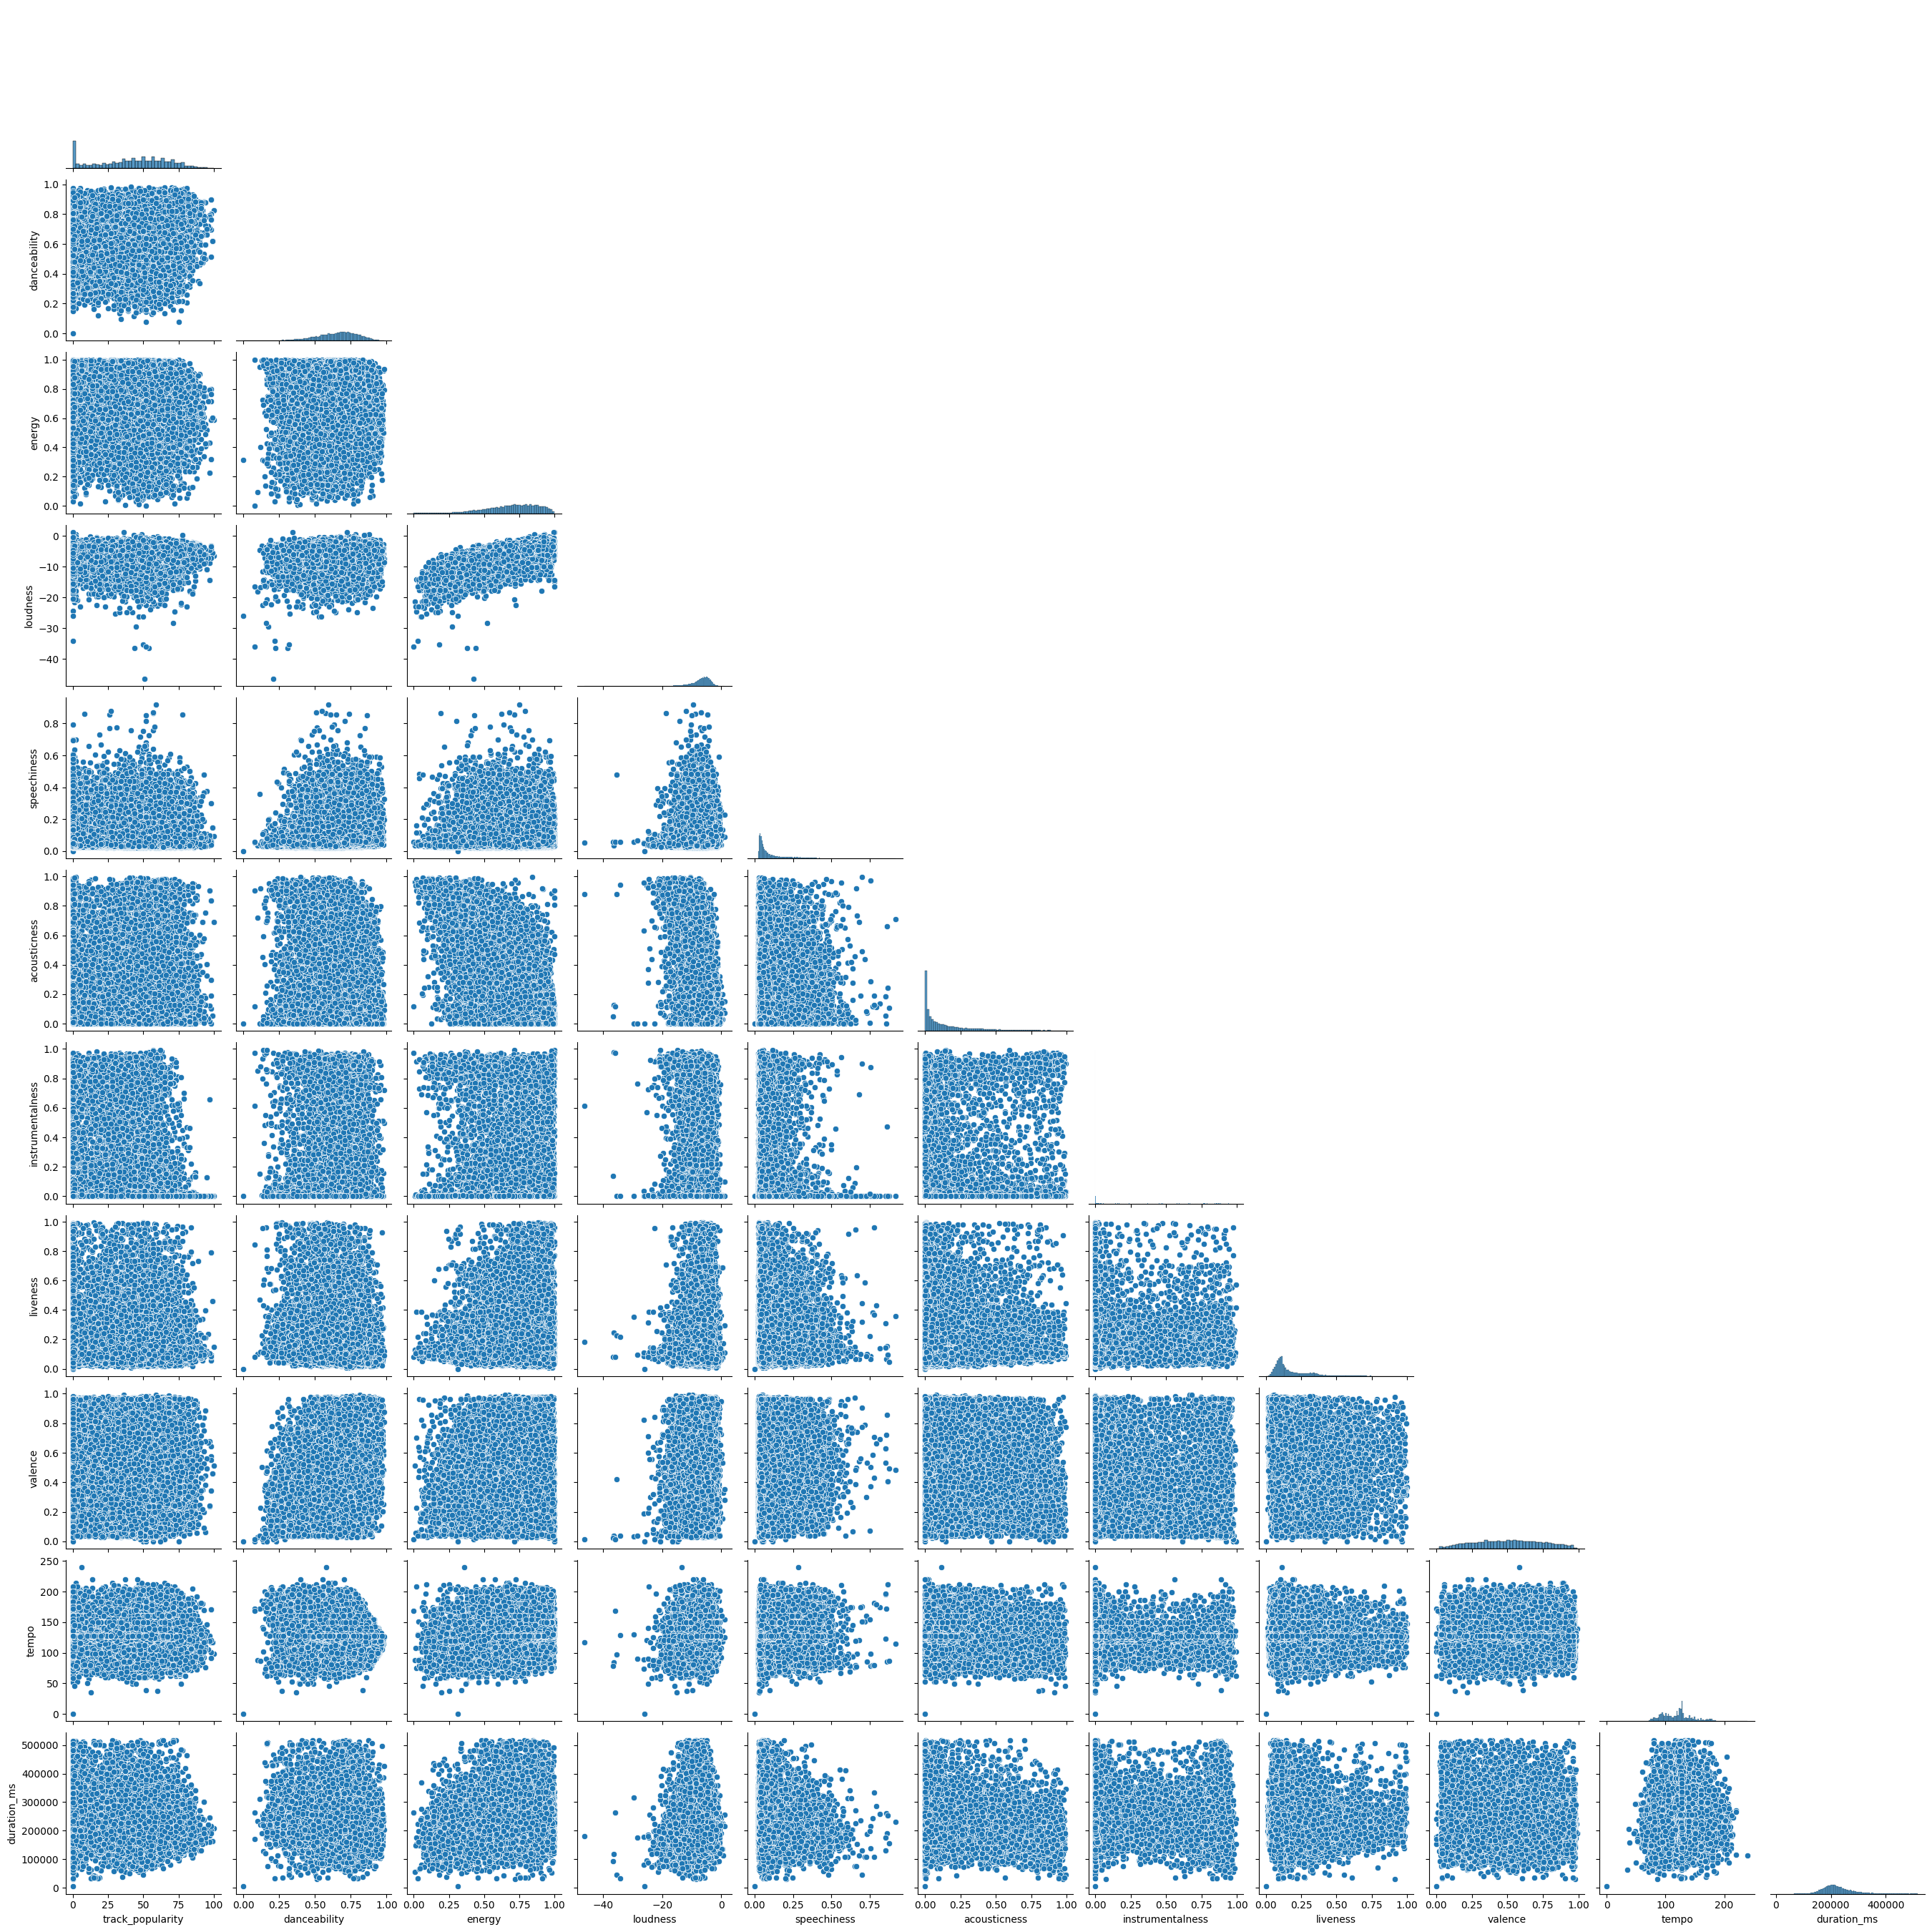

In [19]:
sns.pairplot(data = df_num, corner = True)

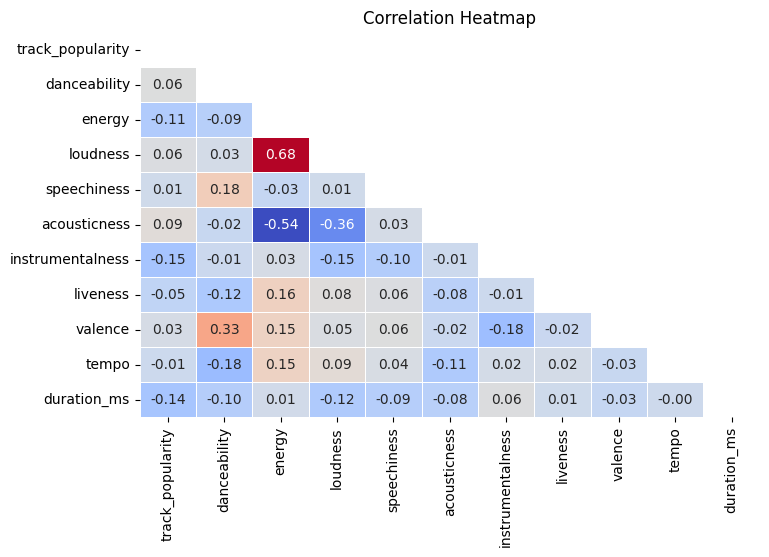

In [20]:
correlation_matrix = df_num.corr(method='pearson')
mask = np.triu(np.ones_like(correlation_matrix))

plt.figure(figsize=(8,5))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    mask=mask,
    cbar=None,
    linewidths=0.5,
    cmap='coolwarm'
)

plt.title('Correlation Heatmap')

plt.show()

*Insights*

* Loudness - Energy (0.68):

There is a strong positive correlation between loudness and energy. This implies that tracks with higher loudness tend to have higher energy levels. This makes intuitive sense, as louder tracks are often perceived as more energetic.

* Acousticness - Energy (-0.54):

There is a negative correlation between acousticness and energy. Tracks with higher acousticness tend to have lower energy levels. This suggests that acoustic tracks are generally less energetic compared to non-acoustic ones.

* Acousticness - Loudness (-0.36):

There is a negative correlation between acousticness and loudness. This implies that acoustic tracks are associated with lower loudness levels. This aligns with expectations, as acoustic music often involves softer and less intense sounds.

* Valence - Danceability (0.33):

There is a positive correlation between valence and danceability. Tracks with higher valence (more positive) tend to be more danceable. This suggests that positive and cheerful music is often associated with danceable qualities.

* Speechiness - Danceability (0.18):

There is a positive correlation between speechiness and danceability, though it is relatively weak. Tracks with more spoken words may have slightly higher danceability, indicating a potential connection between speech-like elements and danceable qualities.

* Valence - Instrumentalness (-0.18):

There is a negative correlation between valence and instrumentalness. Tracks with higher valence (more positive) are less likely to be purely instrumental. This suggests that positive tracks often include vocals.

* Liveness - Energy (0.16):

There is a weak positive correlation between liveness and energy. Tracks with a higher likelihood of being performed live also tend to have slightly higher energy levels.

* Valence - Energy (0.15):

There is a weak positive correlation between valence and energy. Positive tracks may have slightly higher energy levels, contributing to a more lively feel.

* Instrumentalness - Track Popularity (-0.15):

There is a weak negative correlation between instrumentalness and track popularity. Tracks with vocals may be more popular compared to purely instrumental tracks.

* Instrumentalness - Loudness (-0.15):

There is a weak negative correlation between instrumentalness and loudness. Instrumental tracks may have lower loudness levels.

* Duration_ms - Track Popularity (-0.14):

There is a weak negative correlation between duration and track popularity. Shorter tracks may be more popular compared to longer ones.

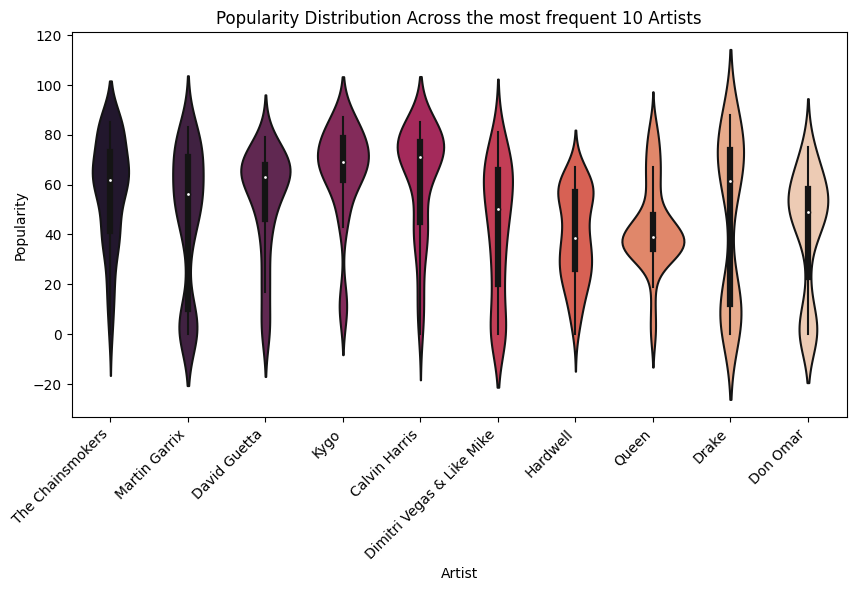

In [21]:
# Filter the DataFrame to include only the most frequent 10 artists
top_artists = df['track_artist'].value_counts().nlargest(10).index
df_top_artists = df[df['track_artist'].isin(top_artists)]

plt.figure(figsize=(10, 5))

sns.violinplot(
    x='track_artist',
    y='track_popularity',
    data=df_top_artists,
    palette='rocket'
)

plt.title('Popularity Distribution Across the most frequent 10 Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')

plt.xticks(rotation=45, ha='right')

plt.show()

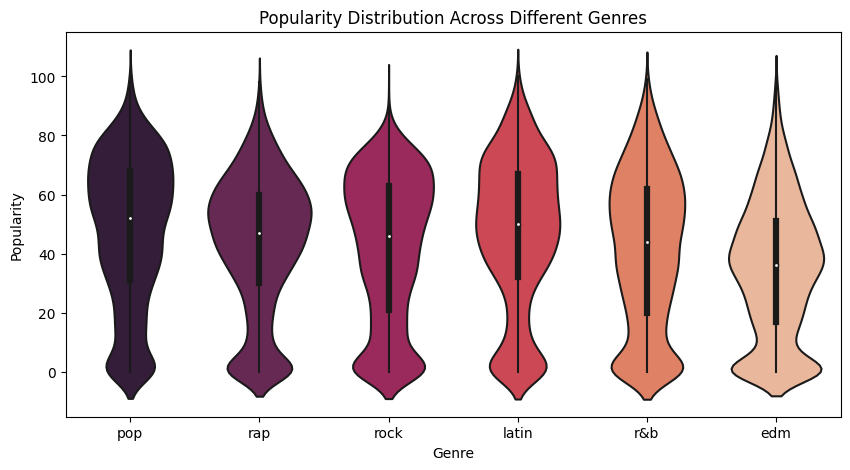

In [22]:
plt.figure(figsize=(10, 5))

sns.violinplot(
    x='playlist_genre',
    y='track_popularity',
    data=df,
    palette='rocket'
)

plt.title('Popularity Distribution Across Different Genres')
plt.xlabel('Genre')
plt.ylabel('Popularity')

plt.xticks(rotation=0)

plt.show()

This plot suggests that generally, tracks in the pop and latin genre have slightly higher popularity levels compared to others while tracks in electro dance music genre have slightly lower popularity levels.

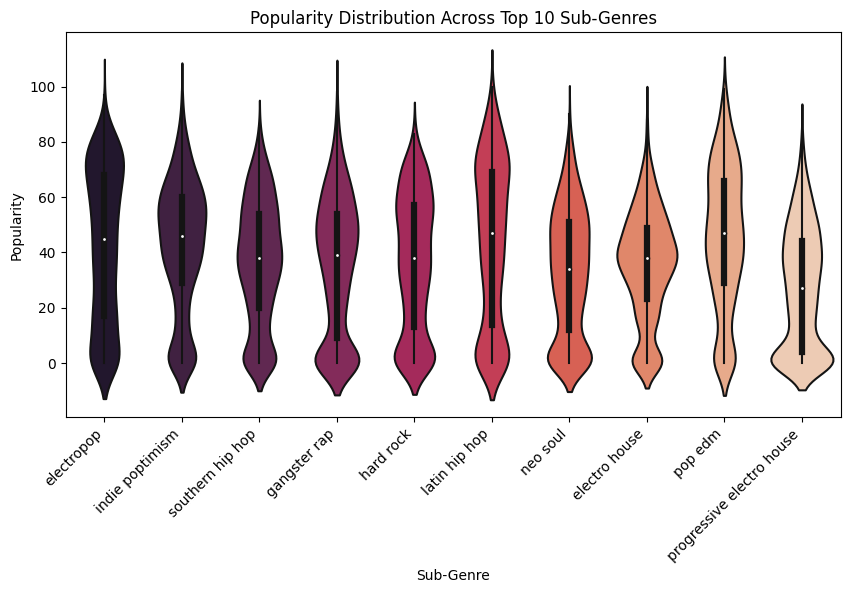

In [23]:
# Filter the DataFrame to include only the top 10 sub-genres
top_subgenres = df['playlist_subgenre'].value_counts().nlargest(10).index
df_top_subgenres = df[df['playlist_subgenre'].isin(top_subgenres)]

plt.figure(figsize=(10, 5))

sns.violinplot(
    x='playlist_subgenre',
    y='track_popularity',
    data=df_top_subgenres,
    palette='rocket'
)

plt.title('Popularity Distribution Across Top 10 Sub-Genres')
plt.xlabel('Sub-Genre')
plt.ylabel('Popularity')

plt.xticks(rotation=45, ha='right')

plt.show()

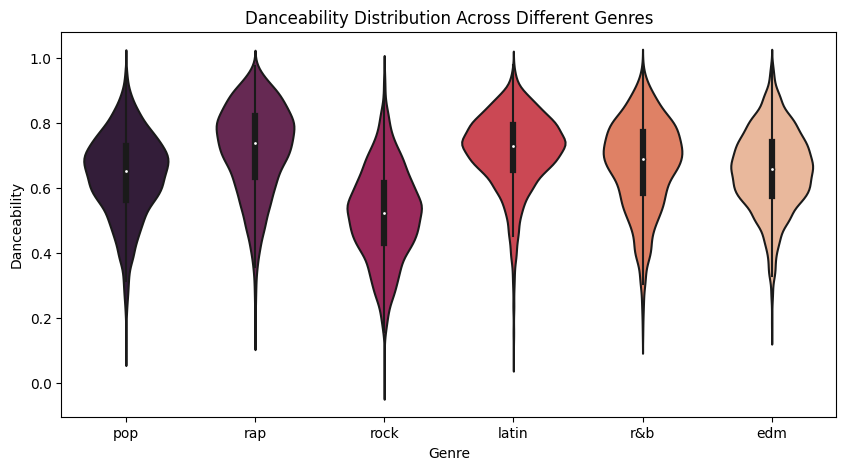

In [24]:
plt.figure(figsize=(10, 5))

sns.violinplot(
    x='playlist_genre',
    y='danceability',
    data=df,
    palette='rocket'
)

plt.title('Danceability Distribution Across Different Genres')
plt.xlabel('Genre')
plt.ylabel('Danceability')

plt.xticks(rotation=0)

plt.show()

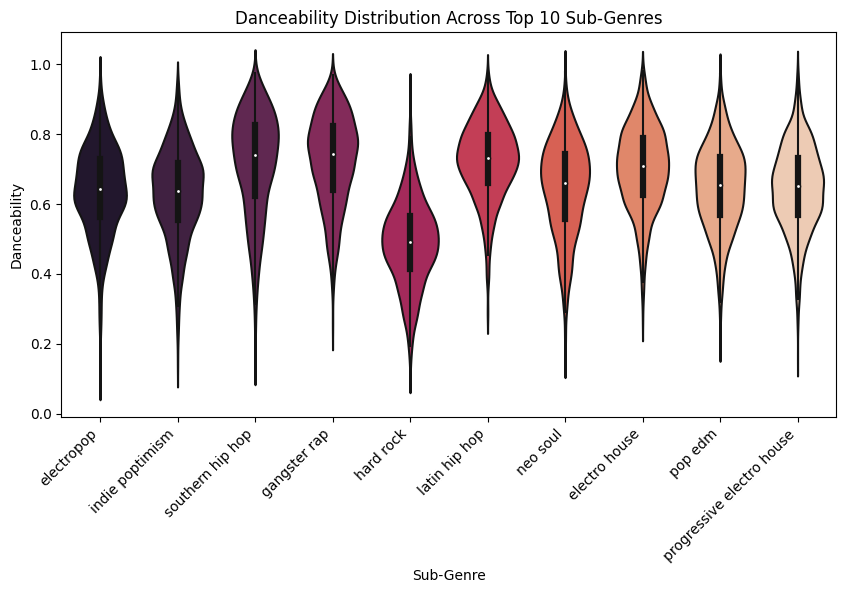

In [25]:
plt.figure(figsize=(10, 5))

sns.violinplot(
    x='playlist_subgenre',
    y='danceability',
    data=df_top_subgenres,
    palette='rocket'
)

plt.title('Danceability Distribution Across Top 10 Sub-Genres')
plt.xlabel('Sub-Genre')
plt.ylabel('Danceability')

plt.xticks(rotation=45, ha='right')

plt.show()

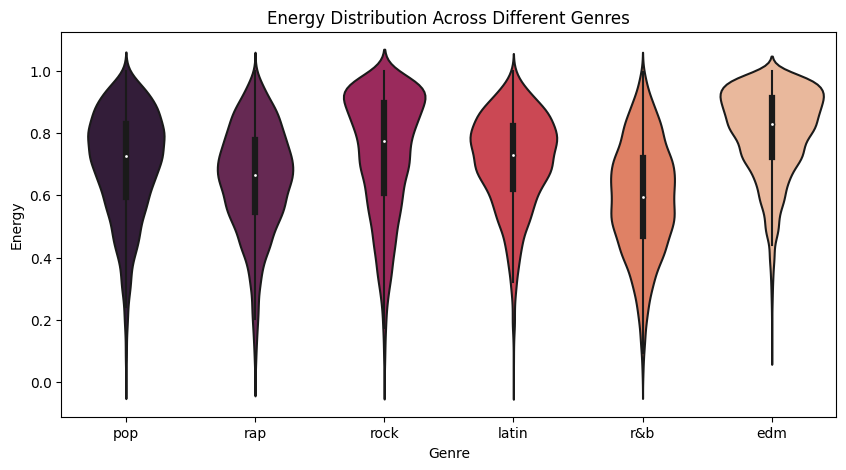

In [26]:
plt.figure(figsize=(10, 5))

sns.violinplot(
    x='playlist_genre',
    y='energy',
    data=df,
    palette='rocket'
)

plt.title('Energy Distribution Across Different Genres')
plt.xlabel('Genre')
plt.ylabel('Energy')

plt.xticks(rotation=0)

plt.show()

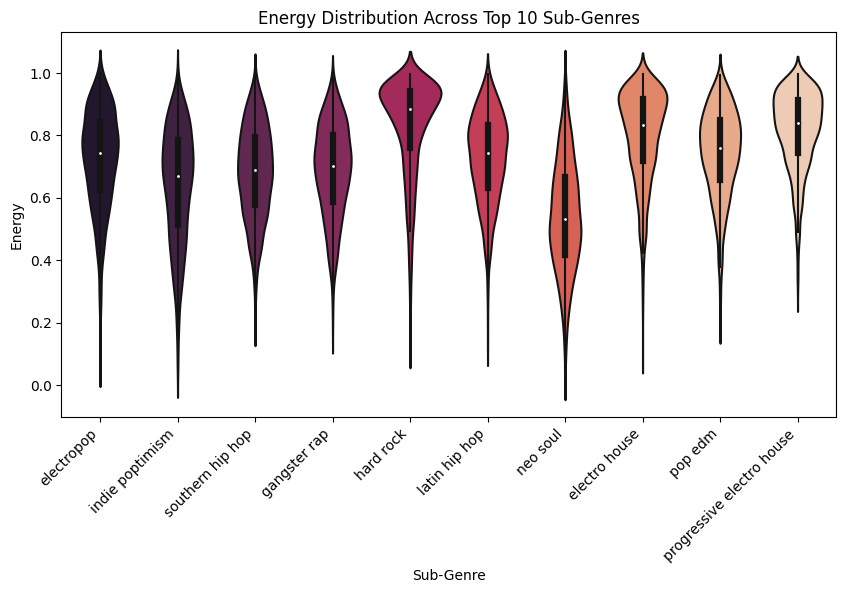

In [27]:
plt.figure(figsize=(10, 5))

sns.violinplot(
    x='playlist_subgenre',
    y='energy',
    data=df_top_subgenres,
    palette='rocket'
)

plt.title('Energy Distribution Across Top 10 Sub-Genres')
plt.xlabel('Sub-Genre')
plt.ylabel('Energy')

plt.xticks(rotation=45, ha='right')

plt.show()

**YEARLY and MONTHLY ANALYSIS**

In [28]:
# Extract year and month from track_album_release_date
df = df.dropna(subset=['track_album_release_date'])
df['year'] = df['track_album_release_date'].dt.year.astype(int)
df['month'] = df['track_album_release_date'].dt.month

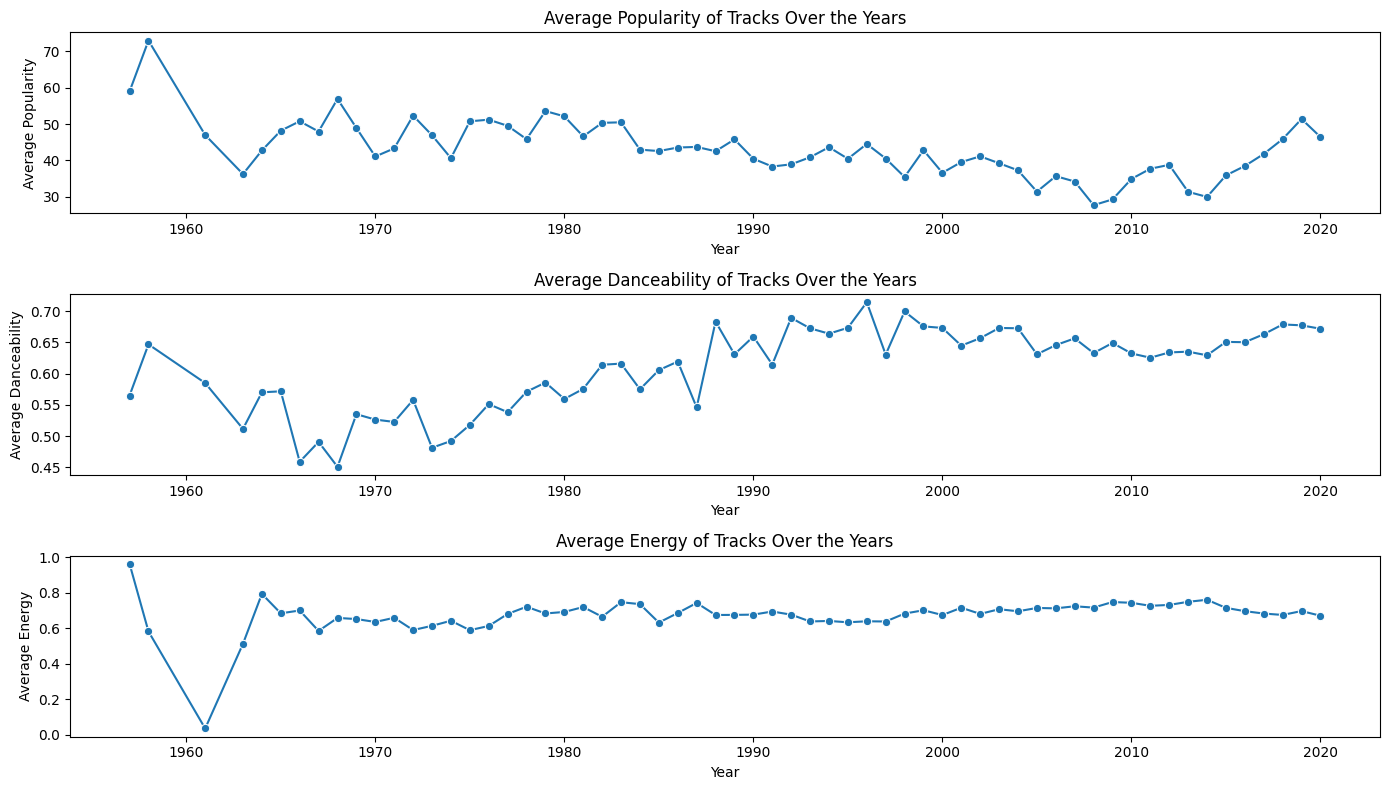

In [29]:
average_popularity_by_year = df.groupby('year')['track_popularity'].mean().reset_index()
average_danceability_by_year = df.groupby('year')['danceability'].mean().reset_index()
average_energy_by_year = df.groupby('year')['energy'].mean().reset_index()

plt.figure(figsize=(14, 8))

# Average Popularity over the years
plt.subplot(3, 1, 1)
sns.lineplot(x='year', y='track_popularity', data=average_popularity_by_year, marker='o')
plt.title('Average Popularity of Tracks Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Popularity')

# Average Danceability over the years
plt.subplot(3, 1, 2)
sns.lineplot(x='year', y='danceability', data=average_danceability_by_year, marker='o')
plt.title('Average Danceability of Tracks Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Danceability')

# Average Energy over the years
plt.subplot(3, 1, 3)
sns.lineplot(x='year', y='energy', data=average_energy_by_year, marker='o')
plt.title('Average Energy of Tracks Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Energy')

plt.tight_layout()
plt.show()

Popularity Trend:
The general slight decrease in average popularity over the years suggests that, on average, tracks may have become less popular. This could be due to increased competition in the music industry, changes in audience preferences, or shifts in promotional strategies.

Danceability Increase:
The noticeable increase in average danceability indicates a trend towards more danceable and potentially upbeat music. This could align with the preferences of listeners who are inclined towards music that is suitable for dancing and has a positive, energetic feel.

Energy Stability:
The relatively constant average energy level suggests that, overall, the energy of tracks has not changed significantly over the years. While danceability has increased, the overall energy of the music remains stable. This could imply that the shift towards more danceable music does not necessarily translate to an increase in overall energy levels.

These trends could have implications for different genres and artists. Genres that focus on danceable and energetic music may experience increased popularity, while those that rely on other qualities might face a more challenging environment. For artists and industry professionals, recognizing the trend towards higher danceability provides an opportunity to create and promote music that aligns with this preference.

It's essential to note that these insights are based on aggregate trends, and individual preferences within the audience may vary.

Next, we analyze the track popularity of different genres for the recent years (2018, 2019, 2020).

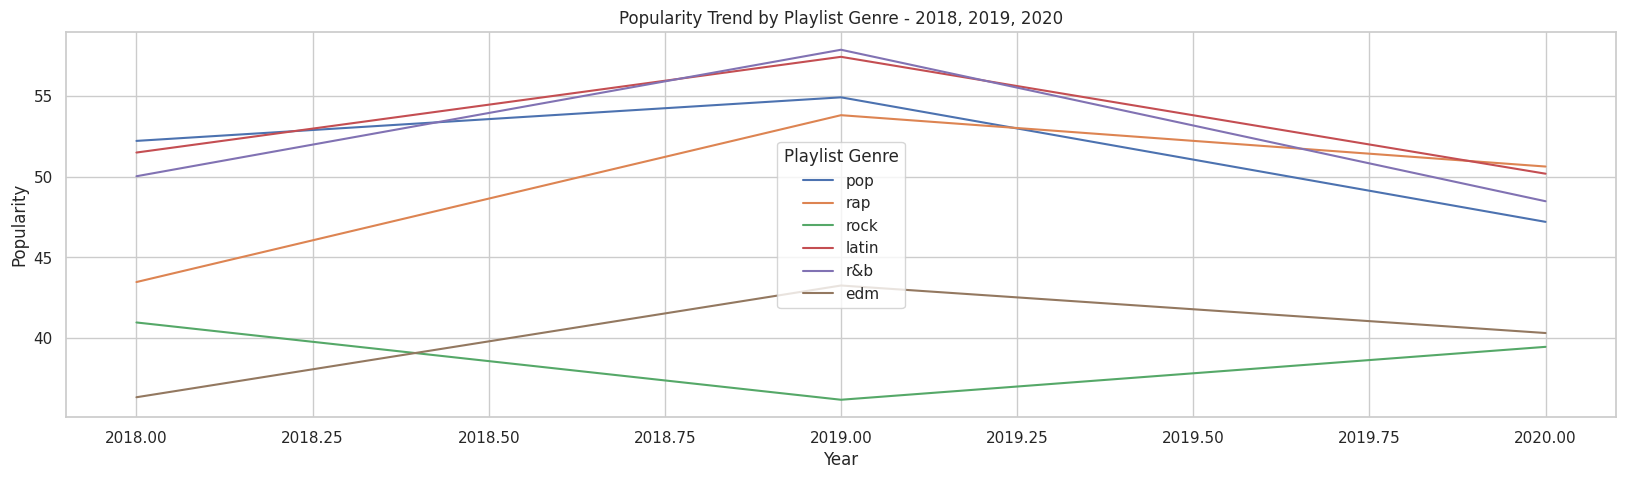

In [30]:
selected_years = [2018, 2019, 2020]
df_selected_years = df[df['year'].isin(selected_years)]

sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})

sns.lineplot(
    data=df_selected_years,
    x="year",
    y="track_popularity",
    ci=None,
    hue="playlist_genre",
)

plt.title("Popularity Trend by Playlist Genre - 2018, 2019, 2020")
plt.xlabel("Year")
plt.ylabel("Popularity")

plt.legend(title="Playlist Genre", loc='best')

plt.show()

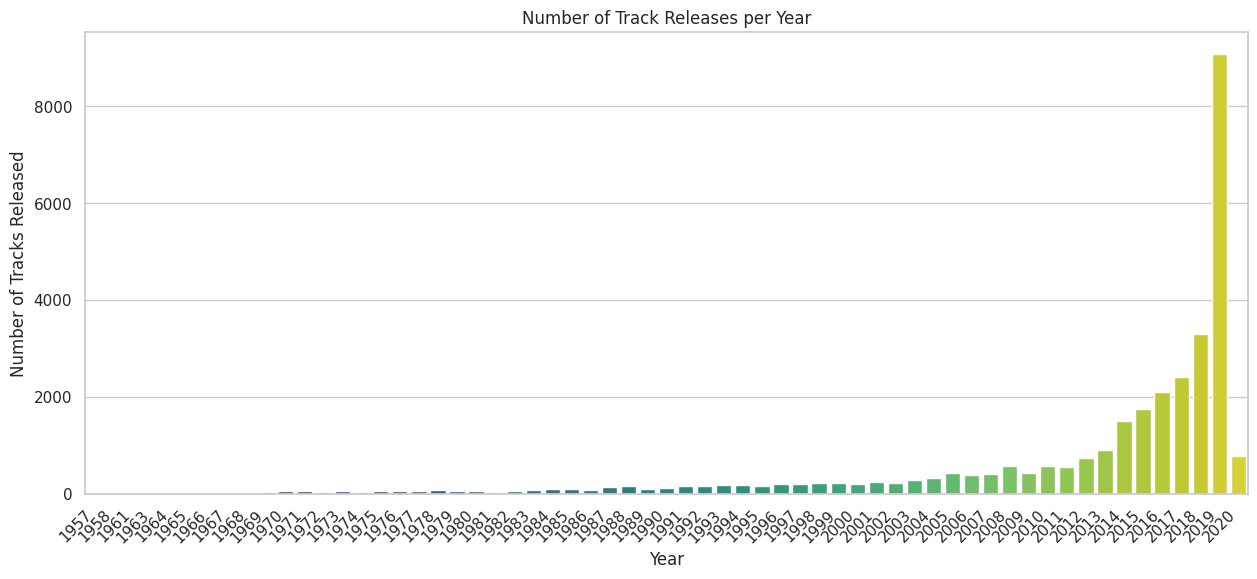

In [31]:
plt.figure(figsize=(15, 6))

sns.countplot(x='year', data=df, palette='viridis')

plt.title('Number of Track Releases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks Released')

plt.xticks(rotation=45, ha='right')

plt.show()

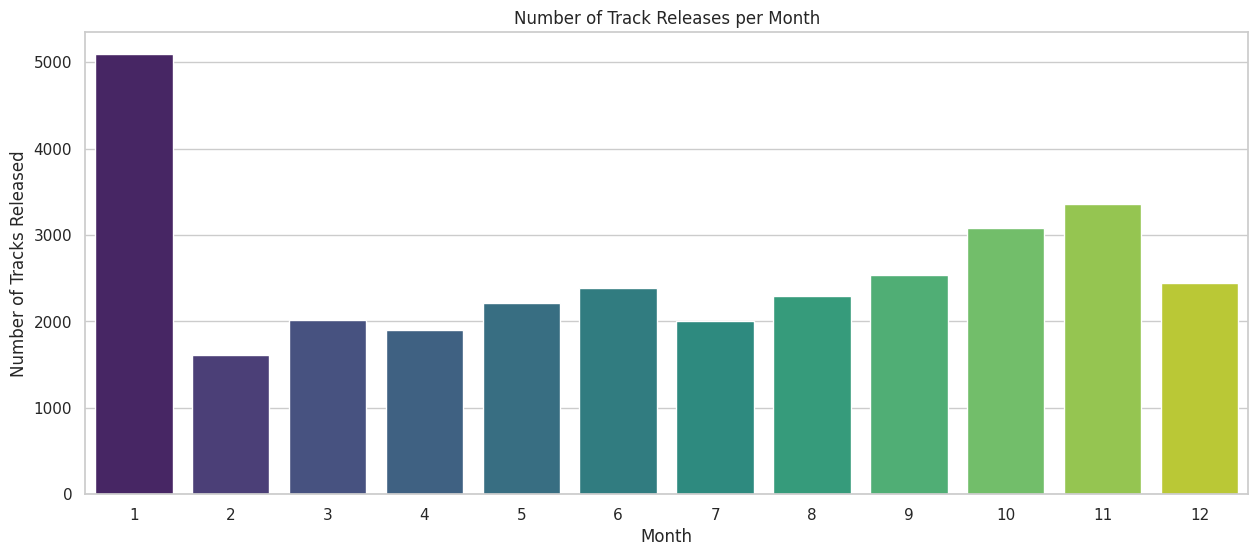

In [32]:
plt.figure(figsize=(15, 6))
sns.countplot(x='month', data=df, palette='viridis')
plt.title('Number of Track Releases per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tracks Released')
plt.show()

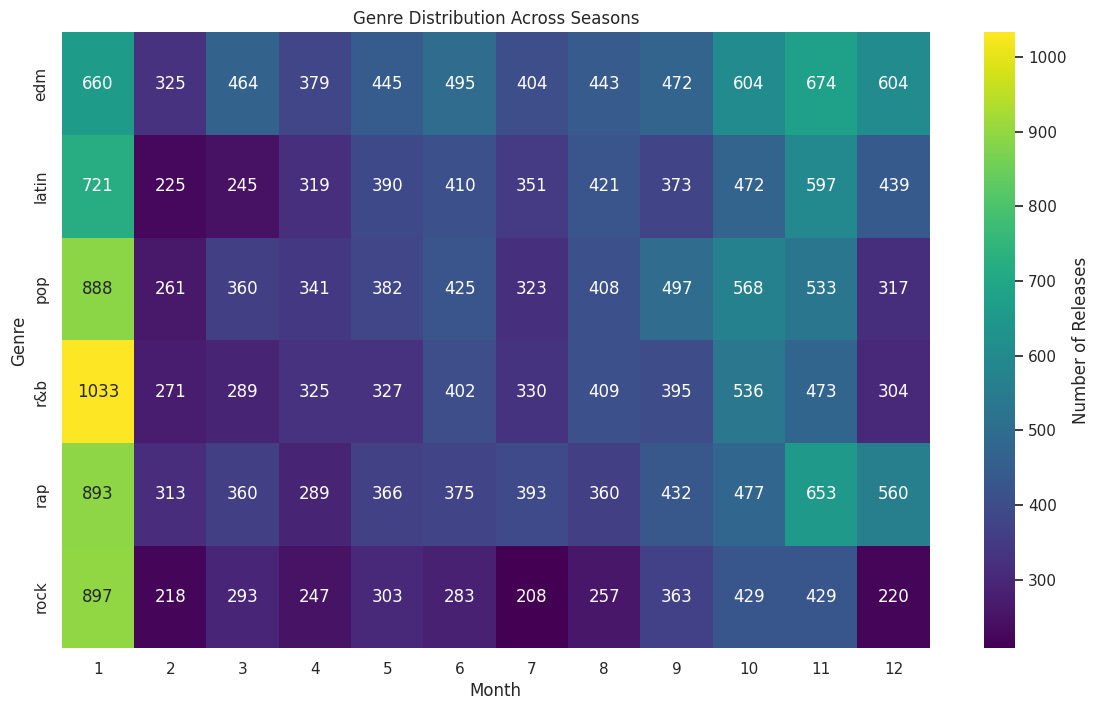

In [33]:
pivot_table = df.pivot_table(index='playlist_genre', columns='month', values='track_id', aggfunc='count')

month_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
pivot_table = pivot_table.reindex(month_order, axis=1)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Number of Releases'})
plt.title('Genre Distribution Across Seasons')
plt.xlabel('Month')
plt.ylabel('Genre')
plt.show()

**MULTIVARIATE ANALYSIS**

We identified a strong correlation between energy and loudness. Now, let's validate this hypothesis across various playlist genres with a sample of 1000 data points.

<Figure size 1500x800 with 0 Axes>

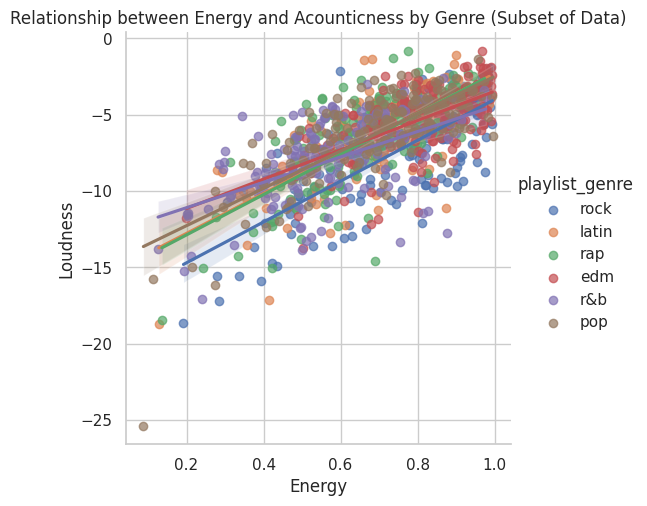

In [34]:
import random
random.seed(42)

num_points = 1000
subset_df = df.sample(n=num_points, random_state=42)

plt.figure(figsize=(15, 8))

sns.lmplot(x='energy', y='loudness', hue='playlist_genre', data=subset_df, scatter_kws={'alpha':0.7})

plt.title('Relationship between Energy and Acounticness by Genre (Subset of Data)')
plt.xlabel('Energy')
plt.ylabel('Loudness')

plt.show()

The plot aligns with our earlier observation of a strong correlational relationship between energy and loudness—higher energy levels generally correspond to increased loudness.

Next, let's explore the relationship between energy and acousticness to investigate whether they exhibit an inverse correlation.

<Figure size 1500x800 with 0 Axes>

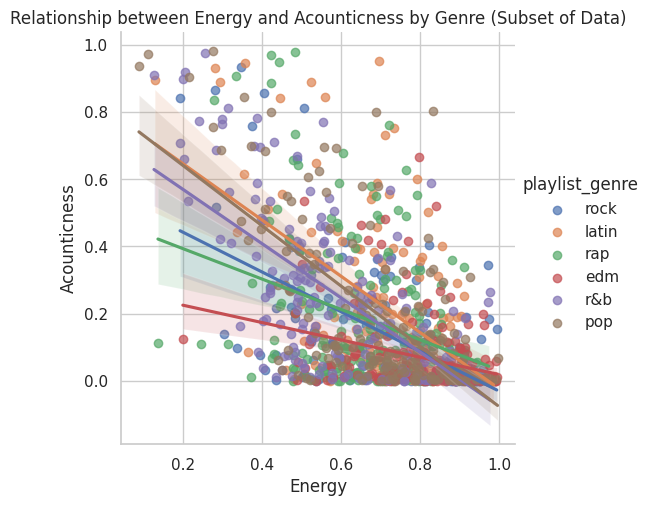

In [35]:
plt.figure(figsize=(15, 8))

sns.lmplot(x='energy', y='acousticness', hue='playlist_genre', data=subset_df, scatter_kws={'alpha':0.7})

plt.title('Relationship between Energy and Acounticness by Genre (Subset of Data)')
plt.xlabel('Energy')
plt.ylabel('Acounticness')

plt.show()

The plot indicates that higher energy levels are associated with lower acousticness across all genres.

Let's now turn our attention to the correlation between the level of positivity in songs and the level of danceability. We previously identified a positive relationship between these two features.

<Figure size 1500x800 with 0 Axes>

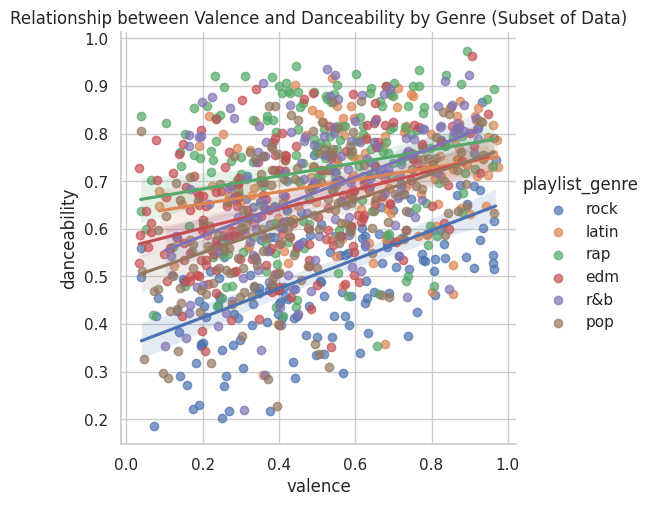

In [36]:
plt.figure(figsize=(15, 8))

sns.lmplot(x='valence', y='danceability', hue='playlist_genre', data=subset_df, scatter_kws={'alpha':0.7})

plt.title('Relationship between Valence and Danceability by Genre (Subset of Data)')
plt.xlabel('valence')
plt.ylabel('danceability')

plt.show()

The plot supports our observation that tracks with a more positive content generally exhibit higher danceability levels.

Let's analyze the relationship between the duration of the song and the track popularity and try to see whether they have a negative correlation.

<Figure size 1500x800 with 0 Axes>

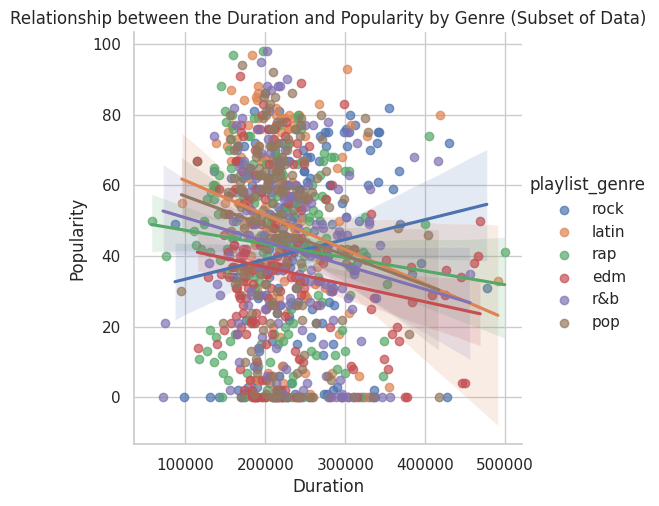

In [37]:
plt.figure(figsize=(15, 8))

sns.lmplot(x='duration_ms', y='track_popularity', hue='playlist_genre', data=subset_df, scatter_kws={'alpha':0.7})

plt.title('Relationship between the Duration and Popularity by Genre (Subset of Data)')
plt.xlabel('Duration')
plt.ylabel('Popularity')

plt.show()

Generally, there is a tendency for the popularity of songs to decrease as their duration increases. This observation aligns with the notion that shorter songs might capture listener attention more effectively.

However, it is crucial to note an exception to this trend within the rock genre. Contrary to the overall pattern, rock songs exhibit a positive correlation between duration and popularity. This suggests that within the rock genre, longer songs may still garner popularity.

It's essential to exercise caution in generalizing these findings, as the analysis is based on a subset of the data.